In [11]:
import findspark
# findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
findspark.init('../spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [12]:
file = 'diabetes_012_health_indicators_BRFSS2015.csv'
df = spark.read.csv(file, header=True, inferSchema=True)

In [13]:
df.printSchema()

root
 |-- Diabetes_012: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)



In [14]:
binary_cols = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'DiffWalk', 'Sex']
nominal_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age',
       'Education', 'Income']

In [15]:
df.select(binary_cols[0:5]).summary().show()
df.select(binary_cols[5:10]).summary().show()
df.select(binary_cols[10:15]).summary().show()
df.select(nominal_cols[0:4]).summary().show()
df.select(nominal_cols[4:7]).summary().show()

+-------+-------------------+-------------------+-------------------+-------------------+-------------------+
|summary|       Diabetes_012|             HighBP|           HighChol|          CholCheck|             Smoker|
+-------+-------------------+-------------------+-------------------+-------------------+-------------------+
|  count|             253680|             253680|             253680|             253680|             253680|
|   mean|0.29692131819615264| 0.4290011037527594| 0.4241209397666351| 0.9626695048880479|0.44316855881425415|
| stddev| 0.6981597284090991|0.49493446268990043|0.49420980465688596|0.18957075436272514| 0.4967606667785607|
|    min|                0.0|                0.0|                0.0|                0.0|                0.0|
|    25%|                0.0|                0.0|                0.0|                1.0|                0.0|
|    50%|                0.0|                0.0|                0.0|                1.0|                0.0|
|    75%| 

+-------+-------------------+--------------------+------------------+-------------------+-------------------+
|summary|             Stroke|HeartDiseaseorAttack|      PhysActivity|             Fruits|            Veggies|
+-------+-------------------+--------------------+------------------+-------------------+-------------------+
|  count|             253680|              253680|            253680|             253680|             253680|
|   mean|0.04057079785556607| 0.09418558814254178|0.7565436770734784| 0.6342557552822453|  0.811419899085462|
| stddev| 0.1972940994001612|  0.2920873147507536|0.4291690433970471|0.48163918717043364|0.39117547168449085|
|    min|                0.0|                 0.0|               0.0|                0.0|                0.0|
|    25%|                0.0|                 0.0|               1.0|                0.0|                1.0|
|    50%|                0.0|                 0.0|               1.0|                1.0|                1.0|
|    75%| 

+-------+-------------------+-------------------+-------------------+-------------------+-------------------+
|summary|  HvyAlcoholConsump|      AnyHealthcare|        NoDocbcCost|           DiffWalk|                Sex|
+-------+-------------------+-------------------+-------------------+-------------------+-------------------+
|  count|             253680|             253680|             253680|             253680|             253680|
|   mean|0.05619678334910123| 0.9510525070955534|0.08417691579943236|0.16822374645222327| 0.4403421633554084|
| stddev| 0.2303017888952299|0.21575870631073912|0.27765350085762547| 0.3740655947328013|0.49642916311850416|
|    min|                0.0|                0.0|                0.0|                0.0|                0.0|
|    25%|                0.0|                1.0|                0.0|                0.0|                0.0|
|    50%|                0.0|                1.0|                0.0|                0.0|                0.0|
|    75%| 

+-------+------------------+------------------+------------------+------------------+
|summary|               BMI|           GenHlth|          MentHlth|          PhysHlth|
+-------+------------------+------------------+------------------+------------------+
|  count|            253680|            253680|            253680|            253680|
|   mean|28.382363607694735|2.5113923052664773|3.1847721538946705|4.2420805739514345|
| stddev| 6.608694201406001| 1.068477362280392| 7.412846696196214| 8.717951307175158|
|    min|              12.0|               1.0|               0.0|               0.0|
|    25%|              24.0|               2.0|               0.0|               0.0|
|    50%|              27.0|               2.0|               0.0|               0.0|
|    75%|              31.0|               3.0|               2.0|               3.0|
|    max|              98.0|               5.0|              30.0|              30.0|
+-------+------------------+------------------+-------

+-------+------------------+------------------+-----------------+
|summary|               Age|         Education|           Income|
+-------+------------------+------------------+-----------------+
|  count|            253680|            253680|           253680|
|   mean| 8.032119205298013| 5.050433617155472|6.053874960580258|
| stddev|3.0542204341684855|0.9857741757276508|2.071147566271524|
|    min|               1.0|               1.0|              1.0|
|    25%|               6.0|               4.0|              5.0|
|    50%|               8.0|               5.0|              7.0|
|    75%|              10.0|               6.0|              8.0|
|    max|              13.0|               6.0|              8.0|
+-------+------------------+------------------+-----------------+



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In order to plot using seaborn and matplotlib, the dataframe needs to be transfered into pandas dataframe.

In [17]:
df = df.toPandas()
df_columns = df.columns
df_summary = df.describe().transpose()

In [ ]:
#df_summary

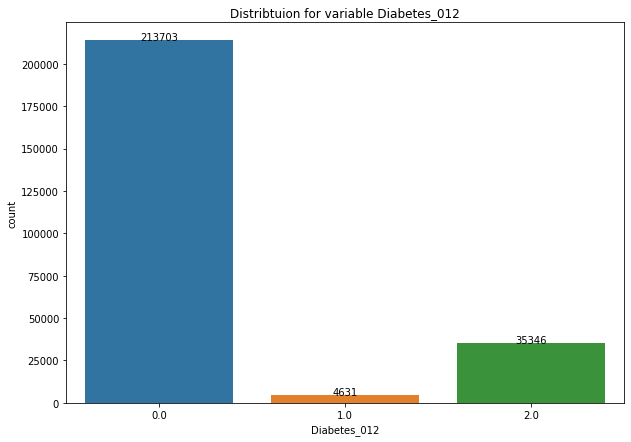

In [18]:
# Distribtuion for target variable Diabetes_012
fig, ax1 = plt.subplots(figsize=(10,7))
graph = sns.countplot(ax=ax1,x='Diabetes_012', data=df)
graph.set_title("Distribtuion for variable Diabetes_012")
graph.set_xticklabels(graph.get_xticklabels())
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
    df['Diabetes_012'].value_counts()[i],ha="center")
    i += 1

In [19]:
df_1 = df[binary_cols] # binary variables
df_2 = df[nominal_cols] # nominal variables

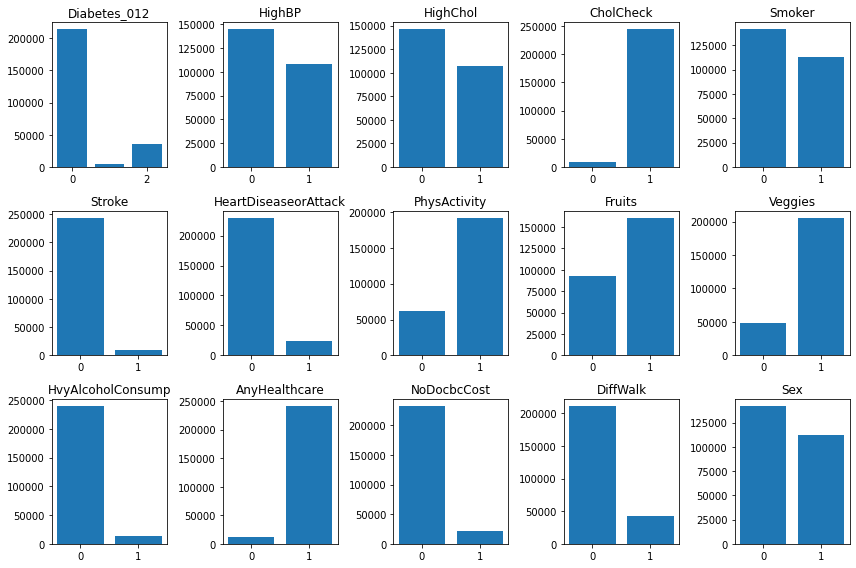

In [20]:
# distribution plots for binary variables
fig, axs = plt.subplots(nrows=3, ncols=5,figsize=(12, 8))
a = axs.ravel()
df_1_columns = df_1.columns
for idx, ax in enumerate(a):
    ax.bar(df_1.iloc[:,idx].value_counts().keys().tolist(), df_1.iloc[:,idx].value_counts().tolist())
    ax.set_title(df_1_columns[idx])
plt.tight_layout()

In [ ]:
# Spark to Pandas
#df_pd = df.toPandas()

# Pandas to Spark
#df_sp = spark_session.createDataFrame(df_pd)

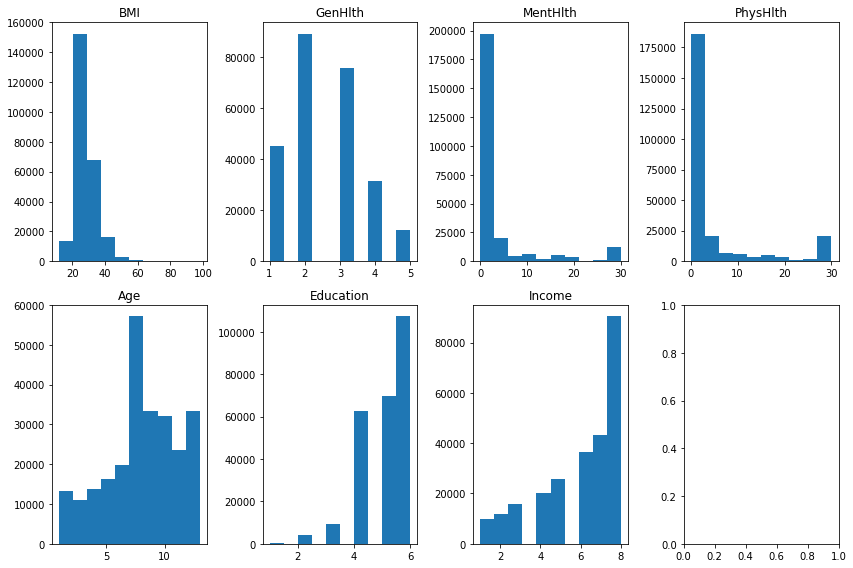

In [21]:
# distribution for categorial varibles
f,a = plt.subplots(nrows=2,ncols=4, figsize=(12, 8))
a = a.ravel()
df_2_columns = df_2.columns
for idx,ax in enumerate(a):
    try:
        ax.hist(df_2.iloc[:,idx])
        ax.set_title(df_2_columns[idx])
    except IndexError:
        pass
plt.tight_layout()

## Execute the "make_data_dirty.py" python file now to randomly creates messy data

## Now have a look at the dirty data:

In [23]:
df_dirty_1 = spark.read.csv('binary_data.csv', header=True, inferSchema=True)
df_dirty_2 = spark.read.csv('nominal_data.csv', header=True, inferSchema=True)

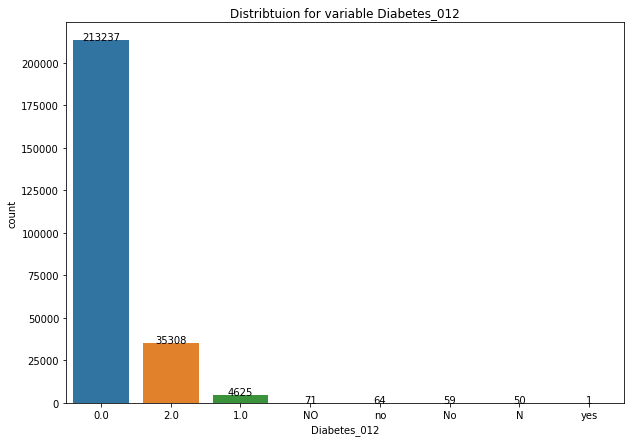

In [24]:
df_1_pd = df_dirty_1.toPandas()
# Distribtuion for target variable Diabetes_012
fig, ax1 = plt.subplots(figsize=(10,7))
graph = sns.countplot(ax=ax1,x='Diabetes_012', data=df_1_pd)
graph.set_title("Distribtuion for variable Diabetes_012")
graph.set_xticklabels(graph.get_xticklabels())
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
    df_1_pd['Diabetes_012'].value_counts()[i],ha="center")
    i += 1

Check availbe values for binary data:

In [25]:
cols_1 = df_dirty_1.columns
print(cols_1)
df_dirty_1.select(cols_1[0:5]).summary().show()
df_dirty_1.select(cols_1[5:10]).summary().show()
df_dirty_1.select(cols_1[10:16]).summary().show()

['Unnamed: 0', 'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


+-------+-----------------+-------------------+------------------+------------------+------------------+
|summary|       Unnamed: 0|       Diabetes_012|            HighBP|          HighChol|         CholCheck|
+-------+-----------------+-------------------+------------------+------------------+------------------+
|  count|           253680|             253415|            253425|            253427|            253415|
|   mean|         126839.5|0.29719556029545363| 0.428920668396504|0.4241526545089721|0.9626559130441652|
| stddev|73231.25248143719| 0.6984264378356645|0.4949229192705167|0.4942146749439578|0.1896039243115853|
|    min|                0|                0.0|               0.0|               0.0|               0.0|
|    25%|            63404|                0.0|               0.0|               0.0|               1.0|
|    50%|           126829|                0.0|               0.0|               0.0|               1.0|
|    75%|           190237|                0.0|        

+-------+-------------------+------------------+--------------------+------------------+------------------+
|summary|             Smoker|            Stroke|HeartDiseaseorAttack|      PhysActivity|            Fruits|
+-------+-------------------+------------------+--------------------+------------------+------------------+
|  count|             253429|            253427|              253436|            253428|            253425|
|   mean|0.44315317948758465|0.0405784392725664| 0.09416941172753197|0.7565185790860361|0.6342795751588809|
| stddev| 0.4967589091072881| 0.197311893509848|   0.292064839618872|0.4291840469772156| 0.481632548662639|
|    min|                0.0|               0.0|                 0.0|               0.0|               0.0|
|    25%|                0.0|               0.0|                 0.0|               1.0|               0.0|
|    50%|                0.0|               0.0|                 0.0|               1.0|               1.0|
|    75%|                1.0

+-------+------------------+-------------------+------------------+-------------------+------------------+-------------------+
|summary|           Veggies|  HvyAlcoholConsump|     AnyHealthcare|        NoDocbcCost|          DiffWalk|                Sex|
+-------+------------------+-------------------+------------------+-------------------+------------------+-------------------+
|  count|            253449|             253401|            253442|             253408|            253450|             253417|
|   mean|0.8113902053712481|0.05619371148680676|0.9510385932482552|0.08416416495496919| 0.168261616540611|0.44033526481891827|
| stddev| 0.391199110951668|0.23029587007338487|0.2157877923317471|0.27763440486958685|0.3740991816037101|0.49642833600190855|
|    min|               0.0|                0.0|               0.0|                0.0|               0.0|                0.0|
|    25%|               1.0|                0.0|               1.0|                0.0|               0.0|     

In [26]:
for col in binary_cols:
    df_dirty_1.select(col).distinct().show()

+------------+
|Diabetes_012|
+------------+
|         1.0|
|        null|
|         0.0|
|           N|
|          No|
|         2.0|
|          no|
|         yes|
|          NO|
+------------+

+------+
|HighBP|
+------+
|   1.0|
|  null|
|   0.0|
|     Y|
|   YES|
|     N|
|    No|
|   Yes|
|    no|
|   yes|
|    NO|
+------+

+--------+
|HighChol|
+--------+
|     1.0|
|    null|
|     0.0|
|       Y|
|     YES|
|       N|
|      No|
|     Yes|
|      no|
|     yes|
|      NO|
+--------+

+---------+
|CholCheck|
+---------+
|      1.0|
|     null|
|      0.0|
|        Y|
|      YES|
|        N|
|       No|
|      Yes|
|       no|
|      yes|
+---------+

+------+
|Smoker|
+------+
|   1.0|
|  null|
|   0.0|
|     Y|
|   YES|
|     N|
|    No|
|   Yes|
|    no|
|   yes|
|    NO|
+------+

+------+
|Stroke|
+------+
|   1.0|
|  null|
|   0.0|
|     Y|
|   YES|
|     N|
|    No|
|   Yes|
|    no|
|   yes|
|    NO|
+------+

+--------------------+
|HeartDiseaseorAttack|
+--------------

In [27]:
df_dirty_2.select(nominal_cols[0:4]).summary().show()
df_dirty_2.select(nominal_cols[4:7]).summary().show()

+-------+-----------------+------------------+-----------------+-----------------+
|summary|              BMI|           GenHlth|         MentHlth|         PhysHlth|
+-------+-----------------+------------------+-----------------+-----------------+
|  count|           253427|            253426|           253410|           253440|
|   mean|28.38230733110521| 2.511466858175562|3.185501756047512|4.242262468434343|
| stddev|6.607749142592301|1.0685144373068274|7.413876801765888|8.717775783320603|
|    min|             12.0|               1.0|              0.0|              0.0|
|    25%|             24.0|               2.0|              0.0|              0.0|
|    50%|             27.0|               2.0|              0.0|              0.0|
|    75%|             31.0|               3.0|              2.0|              3.0|
|    max|             98.0|               5.0|             30.0|             30.0|
+-------+-----------------+------------------+-----------------+-----------------+



+-------+------------------+------------------+-----------------+
|summary|               Age|         Education|           Income|
+-------+------------------+------------------+-----------------+
|  count|            253412|            253441|           253430|
|   mean|  8.03182564361593| 5.102276269427598|6.113711873101053|
| stddev|3.0542540319288025|1.9223584550627644|2.912491844355781|
|    min|               1.0|               1.0|              1.0|
|    25%|               6.0|               4.0|              5.0|
|    50%|               8.0|               5.0|              7.0|
|    75%|              10.0|               6.0|              8.0|
|    max|              13.0|              66.0|             88.0|
+-------+------------------+------------------+-----------------+



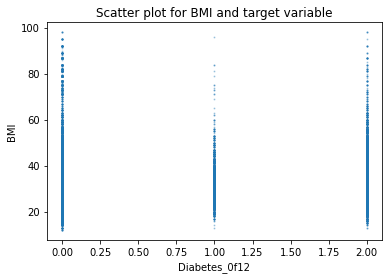

In [28]:
# plot BMI and Diabetes_012 variables
plt.scatter(df["Diabetes_012"], df["BMI"],alpha=.3, s=1)
plt.title("Scatter plot for BMI and target variable")
plt.xlabel("Diabetes_0f12")
plt.ylabel("BMI")
plt.show()